# Some maybe usefull stuff:
- Lets keep all the question to Antonio to trello
- The code to mark text: $**<code style="background:yellow;color:blue"> text</code>**$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import streamlit as st
import os

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [2]:
#Getting the data

raw_data = pd.read_csv(r"C:\Users\katar\OneDrive\Dokumenty\Edukacja\Data Science\6_DS_Project\Project\03_Coding\Data\Fraud.csv")

#raw_data = pd.read_csv(r"D:\06_projekt_i_data_science\coding ground\raw data\onlinefraud.csv")

#### Content
Data for the case is available in CSV format having 6362620 rows and 10 columns.

#### Data Dictionary:

*step* - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

*type* - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

*amount* - amount of the transaction in local currency.

*nameOrig* - customer who started the transaction

*oldbalanceOrg* - initial balance before the transaction

*newbalanceOrig* - new balance after the transaction

*nameDest* - customer who is the recipient of the transaction

*oldbalanceDest* - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

*newbalanceDest* - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

*isFraud* - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

*isFlaggedFraud* - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# ---------EDA-------------

####  Renaming oldbalanceOrg to oldbalanceOrig?

In [3]:
cols_orig = list(raw_data.columns)
cols_new = list(raw_data.columns)
cols_new[4] = 'oldbalanceOrig'
cols_new
cols = dict(zip(cols_orig, cols_new))
# cols
raw_data.rename(columns=cols, inplace=True)
raw_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [4]:
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
raw_data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrig  6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Numeric data

In [6]:
raw_data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000
mean,243.39725,179861.90355,833883.10407,855113.66858,1100701.66652,1224996.39820,0.00129,0.00000
std,142.33197,603858.23146,2888242.67301,2924048.50297,3399180.11297,3674128.94209,0.03590,0.00159
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,156.00000,13389.57000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,239.00000,74871.94000,14208.00000,0.00000,132705.66500,214661.44000,0.00000,0.00000
75%,335.00000,208721.47750,107315.17500,144258.41000,943036.70750,1111909.25000,0.00000,0.00000
max,743.00000,92445516.64000,59585040.37000,49585040.37000,356015889.35000,356179278.92000,1.00000,1.00000


### Categoric data

In [7]:
raw_data.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- the dataset consists of 6 362 620 transactions and 11 columns
- $isFraud$ is the target value
- there are no missig values
- both numeric and categorical variable are present 


In [8]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(raw_data)

,Outlier_percentage
oldbalanceOrig,17.485045
newbalanceOrig,16.555931
oldbalanceDest,12.355523
newbalanceDest,11.607278
amount,5.313503
step,1.613926
isFraud,0.129082
isFlaggedFraud,0.000251


In [9]:
raw_data.isFraud.value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- there is much more not fraud cases -> we will need to check closer the accuracy metrics for the fraud class. 

Only by predicting all transactions as non fraud -> the accuracy will be over 0,99!\
Suitable metrics: __Precision, Recall, F1 score, ROC AUC score__



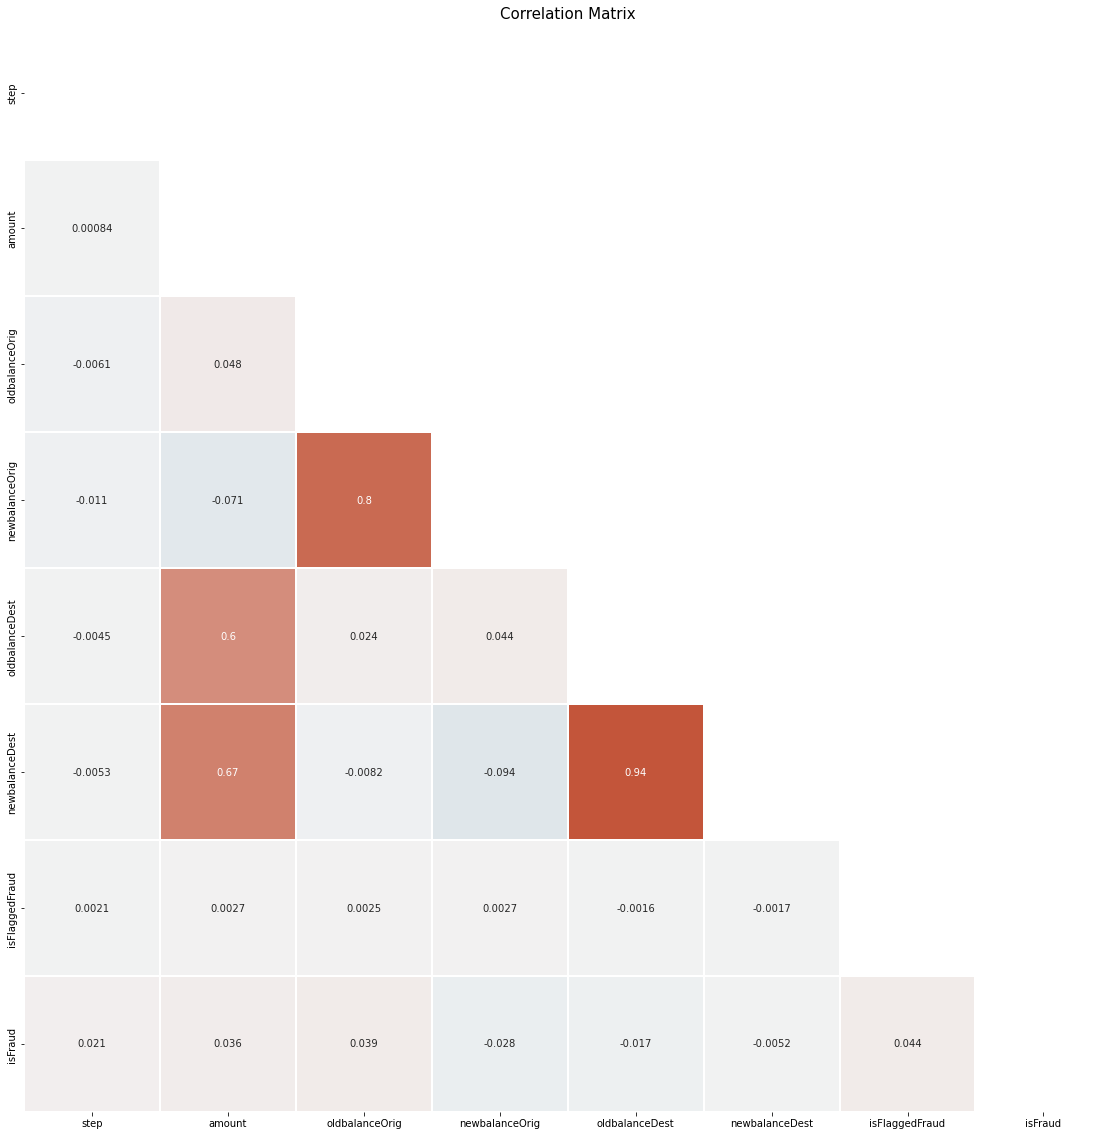

In [10]:
features = [
    'step', 'type', 'amount', 'nameOrig','oldbalanceOrig', 'newbalanceOrig', 'nameDest', 'oldbalanceDest',
    'newbalanceDest', 'isFlaggedFraud', 'isFraud'
]

correlation_matrix = raw_data[features].corr(method="spearman") # pearson / spearman

#from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Correlation Matrix", fontsize=15)

Note:
The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- there are two pars of features which show very high correlation: $oldbalanceOrg$ with $newbalanceOrig$ and $oldbalanceDest$ with $newbalanceDest$. Both are unsuprising.
- there is no strong correlation between target $isFraud$ and any of the other features. (same for both methods pearson and spearman correlation)\
- __?????__ Would it make sense to combine the old-new balance information to a difference instead? (as they have high correlation it is a "common" practice to try new features combining the correlated ones...) It kind of also makes sense, as the two columns describe an amount, and their difference carries the same information but without the exact balance data. It might be even worth to try to combine these columns, and delete the balance columns (and so reducing the dimensionality)__?????__

### Checking the 10 most frequent account origins

In [11]:
orig_acc_counts = raw_data[['nameOrig']].value_counts()

In [12]:
orig_acc_counts.sort_values(ascending=False).head(10)

nameOrig   
C1065307291    3
C1976208114    3
C1784010646    3
C1677795071    3
C1999539787    3
C2098525306    3
C400299098     3
C1530544995    3
C724452879     3
C363736674     3
dtype: int64

In [13]:
# Number of accounts from which money was sent from
len(orig_acc_counts)

6353307

### Checking the 10 most frequent account destinations

In [14]:
dest_acc_counts = raw_data[['nameDest']].value_counts()

In [15]:
dest_acc_counts.sort_values(ascending=False).head(10)

nameDest   
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
dtype: int64

In [16]:
# Number of accounts from which money was sent from
len(dest_acc_counts)

2722362

### **<code style="background:lightgreen;color:black"> Observations:</code>** 

- There are a much bigger number of accounts where money was transfered from, than where money was transfered to. (Ergo a lot of accountholders have transferred money to a small number of accountholders. This can have several meanings:
  - There might be suspicion to Fraud: some of the Origin accounts could be fake/dummy accounts to transfer/launder money to another account
  - Top destination accounts could be companies: accounts to pay utilities to, landlords with many tenants, etc.
- The max number of transfers from the origin accounts is 3, we can assume that there was no "skimming" transaction where an account got hijacked and small amounts of money was moved on several occasions. (NOTE TO SELF: could be worth looking at these transactions, see if the amount is increasing with each transaction, and if these transactions happened within a narrow timeframe.)
- (NOTE TO SELF: we should check the top destination accounts:
    - See if they transfered any money at all
    - See the timeframe of the incoming money transactions
    - See the number of unique accounts they got money from
    - etc.

### Analysis of the distribution of the different types of transactions

Text(0.5, 1.0, 'Type')

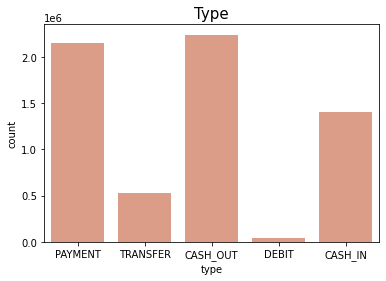

In [17]:
fig,ax=plt.subplots()
sns.countplot(x='type',data=raw_data, color="darksalmon").set_title('Type',size=15)

#### Description of the transaction types:
*PAYMENT* – transaction with card or through online payment services (PayPal)

*TRANSFER* – standard transfer of money from one bank account to another.

*DEBIT* - are most used for B2B transactions as they allow for recurring, automated payments to be made. Customers don’t have to approve payments or remember to pay; the money is simply taken from their account automatically once the direct debit has been set up. Work best for regular invoices.

*CASH_OUT* - we assume it is a standard cash withdrawing transaction (e.g. through ATM) 

*CASH_IN* - standard payment of funds to the account.


### Only the fraudulent transactions

In [18]:
df_fraud = raw_data[raw_data['isFraud'] == 1]
len(df_fraud)

8213

In [19]:
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


Text(0.5, 1.0, 'Type of fraudulent transactions')

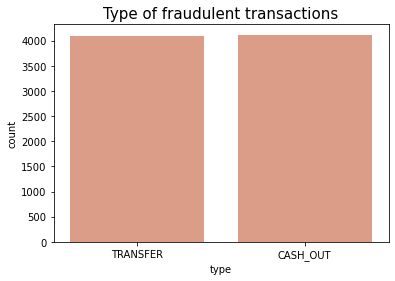

In [20]:
fig,ax=plt.subplots()
sns.countplot(x='type',data=df_fraud, color="darksalmon").set_title('Type of fraudulent transactions',size=15)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 

There seems to be two typical types of fraudulent transactions:
- transfer
- cash out

### Only the flagged transactions

In [21]:
df_fraud_flag = raw_data[raw_data['isFlaggedFraud'] == 1]
len(df_fraud_flag)

16

Text(0.5, 1.0, 'Type of flagged transactions')

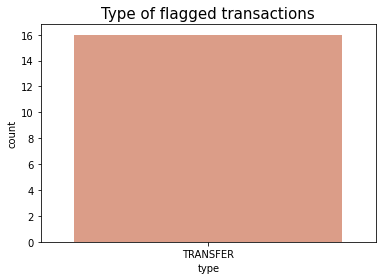

In [22]:
fig,ax=plt.subplots()
sns.countplot(x='type',data=df_fraud_flag, color="darksalmon").set_title('Type of flagged transactions',size=15)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
The current system seems only capable of flagging bank transfers

# Focus --> Frauds

In [23]:
df_fraud_flag

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


### **<code style="background:lightgreen;color:black"> Observations:</code>** 
All the flagged transactions were actually fraud!

### **<code style="background:red;color:black"> __QUESTION:__</code>**  
Do we really need the 'isFlaggedFraud' column at all? (or only for better understanding the logic how they flag possible frauds? Is there any use for this feature?)

### Violinplot of the distribution of the fraudulent amounts

In [24]:
# isFraud editing: 0-not fraud, 1-fraud, 2-flagged (and fraud)
df_fraud['isFraud'].where(df_fraud.isFlaggedFraud==0,2,inplace=True)

C:\Users\katar\AppData\Local\Temp\ipykernel_10128\2218548429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['isFraud'].where(df_fraud.isFlaggedFraud==0,2,inplace=True)


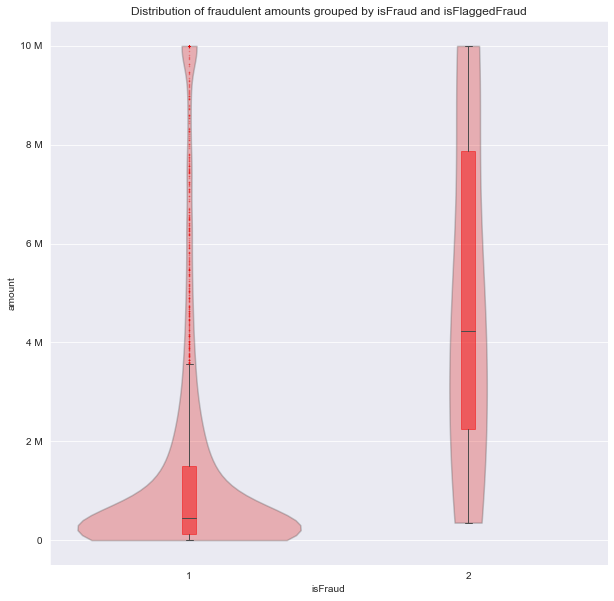

In [27]:
import matplotlib.ticker as ticker
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(10,10))

# fraud
# sns.violinplot(data=df_fraud, y='amount', x='isFraud', ax=ax, color='red')
sns.violinplot(data=df_fraud, y='amount', x='isFraud', ax=ax, color='red', inner=None, cut=0)
boxprops = dict(color='r', alpha=0.5)
flierprops = dict(marker='o', markeredgecolor='r', markersize=0.5, alpha=0.2)
sns.boxplot(data = df_fraud, y='amount', x='isFraud', ax=ax, color='red', width=0.05, fliersize=0.5, linewidth=1, whis=1.5, boxprops=boxprops, flierprops=flierprops)

# formatting (yticks, transparency, position)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.setp(ax.collections, alpha=.3)
plt.title('Distribution of fraudulent amounts grouped by isFraud and isFlaggedFraud')
plt.show()

# ----- DATA PRE-PROCESSING-----

## Creating bins (and one-hot-encoding them) for the account Origins and Destinations

### Destination

In [26]:
# creating a new column with the count of transactions to the destination accounts
raw_data['nrTransDest'] = raw_data.groupby('nameDest')['nameDest'].transform('count')

# creating a new column with the bin categories
bins = list(range(0,121,20))
raw_data['destBins'] = pd.cut(raw_data.nrTransDest, bins)

# one-hot-encoded dataset
raw_data = pd.get_dummies(raw_data, columns = ['destBins'], prefix='dest')
raw_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nrTransDest,"dest_(0, 20]","dest_(20, 40]","dest_(40, 60]","dest_(60, 80]","dest_(80, 100]","dest_(100, 120]"
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,1,1,0,0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,1,1,0,0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,44,0,0,1,0,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,41,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,1,1,0,0,0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,1,1,0,0,0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,1,1,0,0,0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,1,1,0,0,0,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,1,1,0,0,0,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,34,0,1,0,0,0,0


### Origin

In [28]:
# creating a new column with the count of transactions to the destination accounts
raw_data['nrTransOrig'] = raw_data.groupby('nameOrig')['nameOrig'].transform('count')

# creating a new column with the bin categories
bins = list(range(0,121,20))
raw_data['origBins'] = pd.cut(raw_data.nrTransDest, bins)

# one-hot-encoded dataset
raw_data = pd.get_dummies(raw_data, columns = ['origBins'], prefix='orig')
raw_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,"dest_(60, 80]","dest_(80, 100]","dest_(100, 120]",nrTransOrig,"orig_(0, 20]","orig_(20, 40]","orig_(40, 60]","orig_(60, 80]","orig_(80, 100]","orig_(100, 120]"
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,...,0,0,0,1,1,0,0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,...,0,0,0,1,1,0,0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,...,0,0,0,1,0,0,1,0,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,...,0,0,0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,...,0,0,0,1,1,0,0,0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,...,0,0,0,1,1,0,0,0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,...,0,0,0,1,1,0,0,0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,...,0,0,0,1,1,0,0,0,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,...,0,0,0,1,1,0,0,0,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,...,0,0,0,1,0,1,0,0,0,0


### One hot encoding the type column

In [29]:
# one-hot-encoded dataset
raw_data = pd.get_dummies(raw_data, columns = ['type'], prefix='type')
raw_data.head(10)

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,"orig_(20, 40]","orig_(40, 60]","orig_(60, 80]","orig_(80, 100]","orig_(100, 120]",type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,...,1,0,0,0,0,0,0,1,0,0


### Dropping the intermediate nrTransDest and nrTransOrig columns

In [30]:
raw_data.drop(['nrTransDest', 'nrTransOrig'], axis=1, inplace=True)
raw_data.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrig', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'dest_(0, 20]', 'dest_(20, 40]', 'dest_(40, 60]',
       'dest_(60, 80]', 'dest_(80, 100]', 'dest_(100, 120]', 'orig_(0, 20]',
       'orig_(20, 40]', 'orig_(40, 60]', 'orig_(60, 80]', 'orig_(80, 100]',
       'orig_(100, 120]', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

### Spliting the data into training, test and validation set

In [31]:
# spliting the data after preprocesing
raw_train, raw_test_valid = train_test_split(raw_data, test_size=0.2, random_state = 42, shuffle=True, stratify=raw_data["isFraud"])
raw_test, raw_valid = train_test_split(raw_test_valid, test_size=0.5, random_state = 42, shuffle=True, stratify=raw_test_valid["isFraud"])

In [32]:
print("Training set dimensions: ", raw_train.shape)
print("Test set dimensions: ", raw_test.shape)
print("Validation dataset dimensions: ", raw_valid.shape)

Training set dimensions:  (5090096, 27)
Test set dimensions:  (636262, 27)
Validation dataset dimensions:  (636262, 27)


# ------------------POC----------------------------------------- 


In [33]:
# Splitint training data for POC purposes (only about 2 mln instances)

train_rest, raw_small = train_test_split(raw_train, test_size=0.4, random_state = 42, shuffle=True, stratify=raw_train["isFraud"])
raw_small.shape

(2036039, 27)

In [34]:
raw_small.head()

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,"orig_(20, 40]","orig_(40, 60]","orig_(60, 80]","orig_(80, 100]","orig_(100, 120]",type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2803147,225,32914.58,C196266534,49500.00,16585.42,M112640345,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
771843,39,23063.70,C2102126361,27664.00,4600.30,M220300575,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
2048443,181,39875.52,C1521107498,390.00,0.00,M1015489080,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
4223336,306,3119967.74,C899476214,0.00,0.00,C399208882,6475128.93,9595096.67,0,0,...,1,0,0,0,0,0,0,0,0,1
1930071,168,458221.50,C1432896895,6021868.07,6480089.56,C1901800934,1214579.69,756358.19,0,0,...,1,0,0,0,0,1,0,0,0,0


In [35]:
drop_list = ["isFraud", 'nameOrig','nameDest']

X_train_poc = raw_small.drop(drop_list, axis=1)
X_train_poc

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,"dest_(0, 20]","dest_(20, 40]","dest_(40, 60]",...,"orig_(20, 40]","orig_(40, 60]","orig_(60, 80]","orig_(80, 100]","orig_(100, 120]",type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2803147,225,32914.58,49500.00,16585.42,0.00,0.00,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
771843,39,23063.70,27664.00,4600.30,0.00,0.00,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2048443,181,39875.52,390.00,0.00,0.00,0.00,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4223336,306,3119967.74,0.00,0.00,6475128.93,9595096.67,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1930071,168,458221.50,6021868.07,6480089.56,1214579.69,756358.19,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870566,42,138503.58,5545729.96,5684233.54,2248984.69,2110481.11,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3590613,262,130632.44,38372.00,0.00,855496.41,986128.85,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3034937,234,108231.53,12307637.10,12415868.63,6743452.22,6635220.68,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576932,33,1503.26,114287.00,112783.74,0.00,0.00,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
y_train_poc = raw_small['isFraud']
y_train_poc.head()

2803147    0
771843     0
2048443    0
4223336    0
1930071    0
Name: isFraud, dtype: int64

In [37]:
print("X_train_poc set dimensions: ", X_train_poc.shape)
print("y_train_poc set dimensions: ", y_train_poc.shape)

X_train_poc set dimensions:  (2036039, 24)
y_train_poc set dimensions:  (2036039,)


# ------------------------ Training ---------------------

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier()
clf.fit(X_train_poc, y_train_poc)

RandomForestClassifier()

In [40]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc.columns, 'importance': clf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

            feature  importance
5    newbalanceDest       0.264
2    oldbalanceOrig       0.259
1            amount       0.164
0              step       0.098
4    oldbalanceDest       0.075
23    type_TRANSFER       0.055
3    newbalanceOrig       0.040
20    type_CASH_OUT       0.021
22     type_PAYMENT       0.008
19     type_CASH_IN       0.007
13     orig_(0, 20]       0.003
7      dest_(0, 20]       0.002
14    orig_(20, 40]       0.001
6    isFlaggedFraud       0.001
8     dest_(20, 40]       0.001
9     dest_(40, 60]       0.000
15    orig_(40, 60]       0.000
21       type_DEBIT       0.000
10    dest_(60, 80]       0.000
16    orig_(60, 80]       0.000
11   dest_(80, 100]       0.000
17   orig_(80, 100]       0.000
12  dest_(100, 120]       0.000
18  orig_(100, 120]       0.000


# ---------Testing and performance analysis---------

### Data preparation

In [41]:
raw_test.shape

(636262, 27)

In [42]:
X_test_poc = raw_test.drop(columns = drop_list, axis=1) #droppig the same columns as in case of training set
y_test_poc = raw_test['isFraud'] #getting labels

print(X_test_poc.columns)

Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'dest_(0, 20]', 'dest_(20, 40]',
       'dest_(40, 60]', 'dest_(60, 80]', 'dest_(80, 100]', 'dest_(100, 120]',
       'orig_(0, 20]', 'orig_(20, 40]', 'orig_(40, 60]', 'orig_(60, 80]',
       'orig_(80, 100]', 'orig_(100, 120]', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


### Predictions

In [43]:
y_pred =clf.predict(X_test_poc)


### Performance analysis

In [44]:
print(metrics.classification_report(y_test_poc, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998    635440
           1     0.9794    0.7518    0.8507       822

    accuracy                         0.9997    636262
   macro avg     0.9895    0.8759    0.9252    636262
weighted avg     0.9997    0.9997    0.9996    636262



In [45]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred)

### ROC curve

**<code style="background:yellow;color:blue"> FROM THE BOOK </code>**

The roc_curve() function expects labels and scores, but instead of scores you can
give it class probabilities. Let’s use the positive class’s probability as the score:

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 

In [46]:
y_prob = clf.predict_proba(X_test_poc)[:,1]

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob)

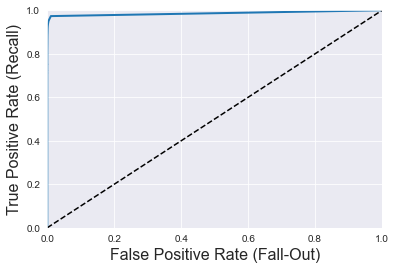

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

plot_roc_curve(fpr,tpr)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_poc, y_prob)

0.98619027281669

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
    -   looks to good to be true!!! 
    -   precision 0.9795, recall 0.7543 and f1 score 0.8522 for the positive class (frauds)
    -   roc_auc_score 0.9886 it is really good result